# Week 9 Exercises


## Ex 1:  Maximal Margin By Hand 

- Assume you are given two points $x_1=(1, 1)$ with class -1 and $x_2 = (11, 11)$ with class 1. What is the maximum separating hyperplane. E.g. what are vectors w and b that maximally separates these points? What are the support vectors? What is the margin? Can you find the parameters w, b the SVM will find without trying to solve the SVM problem directly, but instead thinking a little. Try visualizing the data set.
- If we have three points in class -1 (-10, -10), (-5, 2), (1, 1) and four points in class 1 (20, 23), (15, 17), (12, 10), (10, 12). What is the maximal separating hyperplane (w,b)? Try visualizing the data set before you work too hard.
What are the support vectors? What is the margin? You can run the code below the next exercise to get the answers from actually running the python sklearn SVM implementation on the data.
- Write down the exact form of the SVM problem we need to solve, if the input data is defined as the 7 points above.
The convex quadratic program was defined as 

$\min_{w, b} \frac{1}{2}{||w||^2}$

s.t. $\forall i : y_i(w^\intercal x_i + b) \geq 1$

You job is thus to write down the constraints.


### SOLUTION MATH
1. The maximum separating hyperplane is the bisector between the two points. Its normal vector is $w = (1/\sqrt{2},1/\sqrt{2})$. With that normal vector, the margins become $(11,11)^\intercal (1/\sqrt{2}, 1/\sqrt{2}) + b = b + \sqrt{2} \cdot 11$ and $(-1)((1,1)^\intercal(1/\sqrt{2},1/\sqrt{2}) + b) = -b - \sqrt{2}$. Choosing $b$ such that $b + \sqrt{2} \cdot 11 = -b - \sqrt{2}$ gives $b = -12/\sqrt{2}$. The margin is then $-12/\sqrt{2} + \sqrt{2} \cdot 11 = -12/\sqrt{2} + 22 /\sqrt{2} = 10/\sqrt{2}$.

SVM-problem: Notice that $w$ is on the form $(w_1,w_1)$ - since it has the direction of the bisector between $x_1$ and $x_2$. Further notice that if we have a solution $w,b$ such that $y_1(w^Tx_1+b)=-(w^Tx_1+b)>1$ or $y_2(w^Tx_2+b)=(w^Tx_2+b)>1$ we may change $b$ such that both constraints holds with strict inequalities, and then decrease the length of $w$ until one of the constraints holds with equality, thus the solution $w,b$ could be made to a new solution $w',b'$ where the length of $w'$ is smaller and thus the loss smaller. Hence an optimal solution $w,b$ must be such that  $-(2w_1+b)=-(w^Tx_1+b)=1$ and $2\cdot 11w_1+b=(w^Tx_2+b)=1$. Now solving this set of linear equations in $w_1$ and $b$ we get that $w_1=1/10$ implying $w=(1/10,1/10)$ and $b=-12/10$ (as the print of sklearns solution in exercise 2 also shows). 


2. The new points do not change the maximal hyperplane

3. The constraints become:

$(-1)(-10 w_1 - 10 w_2 + b) \geq 1$

$(-1)(-5 w_1 + 2 w_2 + b) \geq 1$

$(-1)(w_1 + w_2 + b) \geq 1$

$(20 w_1 + 23 w_2 + b) \geq 1$

$(15 w_1 + 17 w_2 + b) \geq 1$

$(12 w_1 + 10 w_2 + b) \geq 1$

$(10 w_1 + 12 w_2 + b) \geq 1$

### end solution


## Ex 2: Regularized SVM

Consider a regularized SVM with regularization hyperparameter C.

$\min_{w, b, \xi} \frac{1}{2}{||w||^2} + C \sum_{i=1}^n \xi_i$

s.t. $\forall i : y_i(w^\intercal x_i + b) \geq 1 - \xi_i$

and $\forall i : \xi_i \geq 0$

Assume you are given three points $x_1=(1, 1)$ with class -1 and $x_2=(3, 3), x_3 = (11, 11)$ with class 1.
- Write down the exact form of the SVM problem we need to solve if the input data is $D=\{x_1, x_2, x_3\}$.
  Thus, your job is thus to write down the constraints.

- What is the best cost you can get when using the hyperplane $w = [ 0.1, 0.1]$ and  $b: -1.2$. i.e. how can you pick $\xi_1, \xi_2, \xi_3$ such that the constraints are satisfied while minimizing the cost with w and b  fixed.

- Is there a general way given, $w$ and $b$, to compute the best $\xi_i$ 
- Can you find a $w, b$ with a smaller cost for $C=1$? If you like, you can use the svm code below to experiment.
  


Also be sure to see how to apply an SVM implementation on data using Sklearn.

### solution math
1.
  
  $(-1)(w_1 + w_2 + b) \geq 1-\xi_1$
  
  $(3w_1 + 3w_2 + b) \geq 1-\xi_2$
  
  $(11w_1 + 11w_2 + b) \geq 1-\xi_3$
  
2.
The constraints become:

$(-1)(0.1 + 0.1 - 1.2) \geq 1-\xi_1 \Rightarrow \xi_1 \geq 0$

$(0.3 + 0.3 - 1.2) \geq 1-\xi_2 \Rightarrow \xi_2 \geq 1.6$

$(1.1 + 1.1 - 1.2) \geq 1-\xi_3 \Rightarrow \xi_3 \geq 0$

Hence the best is to choose $\xi_1=\xi_3 = 0$ and $\xi_2 = 1.6$, giving a cost of $\frac{1}{2}{||w||^2} + 1.6 C = 0.01 + 1.6 C$.

3.
Yes, simply solve $y_i(w^\intercal x_i + b) = 1 - \xi_i$. The best choice is thus $\xi_i = \max(0,1-y_i(w^\intercal x_i + b))$.

4.
 We can use the separating hyperplane $w=(1/\sqrt{2}, 1/\sqrt{2})$ with $b=-2\sqrt{2}$. Then all constraints are satisfied with $\xi_i = 0$ since:
  
  $(-1)(1/\sqrt{2}+1/\sqrt{2} - 2\sqrt{2}) \geq 1 \Leftrightarrow \sqrt{2} \geq 1$
  
  $(3/\sqrt{2}+3/\sqrt{2} - 2\sqrt{2}) \geq 1 \Leftrightarrow \sqrt{2} \geq 1$
  
  $(11/\sqrt{2}+11/\sqrt{2} - 2\sqrt{2}) \geq 1 \Leftrightarrow 9 \sqrt{2} \geq 1$
      
these are clearly all satisfied. The cost then becomes $\|w\|^2 + 0 = 1$.
### end solution


First Exercise From Above
Hyperplane found w: [0.1 0.1] b: -1.1999999999999997
Margin 1/||w||: 7.071067811865474
Support Vectors:
[[ 1.  1.]
 [11. 11.]]
what is hyp [-1.2  0.1  0.1]


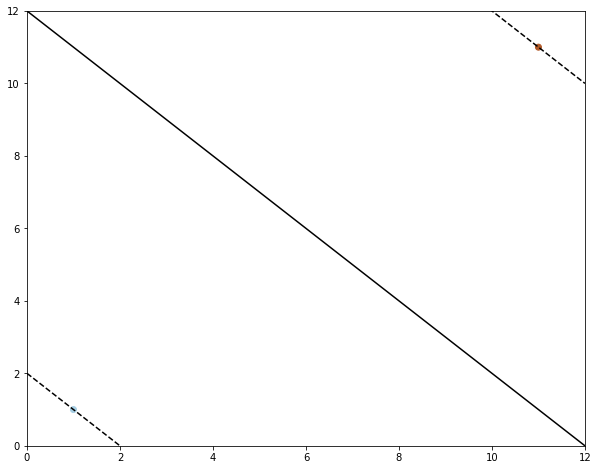

Second Exercise From Above
Hyperplane found w: [0.09991352 0.1001057 ] b: -1.2001473355844554
Margin 1/||w||: 7.070385165969472
Support Vectors:
[[ 1.  1.]
 [12. 10.]
 [10. 12.]]
what is hyp [-1.20014734  0.09991352  0.1001057 ]


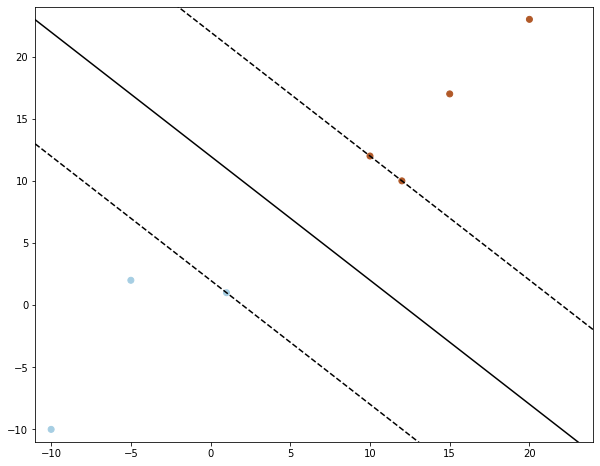

In [1]:
# code for running the example above
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_hyperplane(w, *args, **kwargs): 
    if w[1]==0 and w[2]==0:
        raise ValueError('Invalid hyperplane')
    xmin, xmax, ymin, ymax = plt.axis()
    
    if w[2]==0:
        # Vertical line
        x = np.array((1/w[1], 1/w[1]))
        y = np.array((ymin, ymax))
    else:
        x = np.array((xmin, xmax))
        y = (-w[0]-w[1]*x)/w[2]       
    # plot the line
    plt.plot(x, y, *args, **kwargs)

def run_svm(X, Y, kernel='linear', **kwargs):
    # fit the model
    clf = svm.SVC(kernel=kernel, **kwargs)
    clf.fit(X, Y)

    # get the separating hyperplane
    
    print('Hyperplane found w: {0} b: {1}'.format(clf.coef_[0],clf.intercept_[0]))
    margin = 1.0/np.linalg.norm(clf.coef_[0])
    print('Margin 1/||w||: {0}'.format(margin))
    hyp = np.r_[clf.intercept_,clf.coef_[0]]
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=Y,cmap=plt.cm.Paired)
    print('Support Vectors:')    
    print(clf.support_vectors_)
    
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
    plt.xlim(X.min()-1,X.max()+1)
    plt.ylim(X.min()-1,X.max()+1)
    plot_hyperplane(hyp,'k-')
    
    print('what is hyp',hyp)
    tmp = hyp[0]
    hyp[0] = tmp + 1
    plot_hyperplane(hyp,'k--')
    hyp[0] = tmp -1
    plot_hyperplane(hyp,'k--')
    hyp[0] = tmp
    
    #plt.axis('tight')
    plt.show()

X = np.array([[1, 1], [11, 11]])
Y = np.array([0, 1])
print('First Exercise From Above')
run_svm(X, Y, C=1)
plt.show()

print('Second Exercise From Above')
X = np.array([(-10, -10), (-5, 2), (1, 1),  (20, 23), (15, 17), (12, 10), (10, 12)])
Y = np.array([0, 0, 0, 1, 1, 1, 1])
run_svm(X, Y)
plt.show()

#print('Larger Separable Data set')
#n = 50
#X = 2*np.r_[2*np.random.randn(n, 2) - [4, 4], 2*np.random.randn(n, 2) + [5, 5]]
#Y = [-1] * n + [1] * n
#run_svm(X, Y)
#plt.show()


## Ex 3: Kernel Perceptron 
In this exercise you must implement Kernel Perceptron for learning from a stream of data.
The learning algorithm will only do one pass over the data like in a system processing an input data stream.

The important part is how to actually add Kernels to the Perceptron learning algorithm.

First we need to represent the hyperplane in the feature space induced by the Kernel.
This must be implemented in the class *Representer* as described below.

Remember the Perceptron algorithm, the current solution hyperplane is updated on a mispredicted data point $(x, y)$ as
$$
w = w + y x
$$
In this exercise, the hyperplane exists in feature space and must be updated there, but in the same way
with one difference. We include a learning rate $\alpha>0$ that scales the update.
The update that must be implemented becomes
$$
w = w + \alpha y \phi(x)
$$
where $\phi$ is the feature transform corresponding to the used Kernel. As we will see, we do not really need to know what $\phi$ is.

This means that the hyperplane solution is a linear combination of (transformed) input points and thus can be written as
$$
w = \sum_i \alpha_i \phi(x_i)
$$
and may be represented by storing the list of $\alpha_i$ and $x_i$. Note we have not discussed how to initialize $w$, which can be done just like an update. Also note that we do not use a bias variable in this exercise.


**Task:** In the class Representer implement 
* update(x, $\alpha$): add point x with weight $\alpha$ to the hyperplane
* dot(z): compute and return 
$$
 w^\intercal \phi(z) = \sum_i  \alpha_i (\phi(x_i)^\intercal \phi(z))  = \sum_i \alpha_i K(x_i, z)
$$ 
(note the indexing here is not over the data set but the set of weight and points comprising w - and we assume the lists are non-empty)

After you have implemented the representation of the hyperplane you must implement
The Perceptron Classifier in the *KernelPerceptron* class.
* Implement the score function (compute accuracy of classifier on given data X with labels y)
* Implement the fit method - do one scan over the data and for each misprediction (x, y) update $w$ by adding $\alpha y \phi(x)$

Test your implementation by running the cell.

In Sample Accuracy after one scan: 0.97


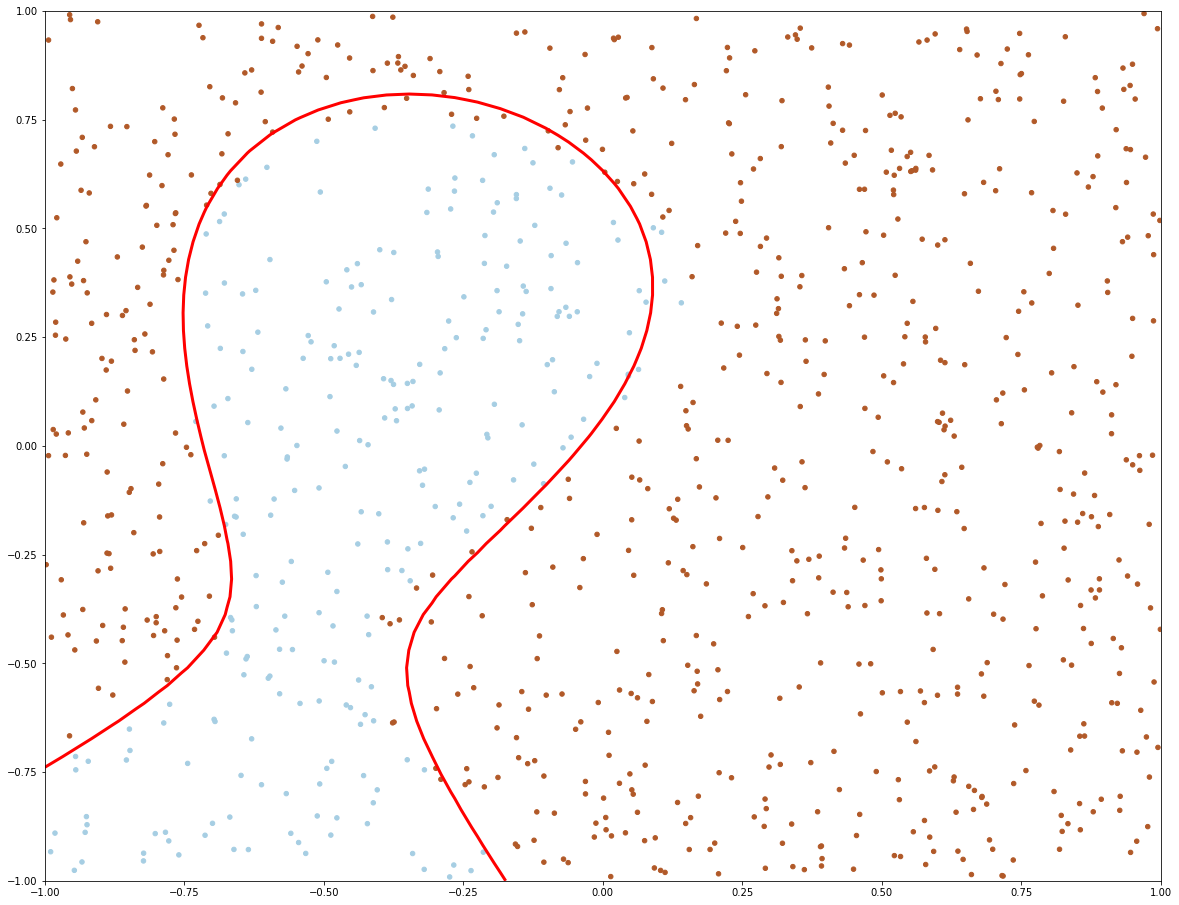

In [2]:
# streaming perceptron with kernels
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    """ Simple helper function for downloading and loading data """
    filename = 'nonlinear_data.npz'
    D = np.load(filename)
    return D

def visualize_kernel_perceptron(X, Y, w):
    """ Helper function for visualizing decision boundary in input space"""
    fig, ax = plt.subplots(figsize=(20, 16))
    ax.scatter(X[:, 0], X[:,1 ], c=Y, cmap=plt.cm.Paired, s=20)
    nsize = 50
    xs = ys = np.linspace(-1, 1, nsize)
    xm, ym = np.meshgrid(xs, ys)
    img = np.zeros((nsize, nsize)) # makes a 100 x 100 2d array
    for i, zy in enumerate(ys):
        for j, zx in enumerate(xs):    
            point = np.array([zx, zy])
            predict = w.dot(point)
            img[i, j] = predict
    ax.contour(xs, ys, img, [0], colors='r', linewidths=3)
    plt.show()

def get_rbf_kernel(gamma=1.0):
    assert gamma > 0, 'Gamma must be positive'
    def K(x, z):
        return np.exp((-gamma * np.sum((x-z)**2)))
    return K

class Representer():
    """ Represents a hyperplane H in Feature space that is a linear combination of transformed points from input space
        
        The class can evaluate an input in the original input space mapped to H against the hyperplane        
    """
    def __init__(self, K):
        self.dat = list()
        self.alpha = list()
        self.K = K

    def update(self, x, a):
        """ Update hyperplane Representer by point x with weight a i.e. w = w + a * x
        
        Args:
            x: np.array - data point
            a: float - data weight
        """
        ### YOUR CODE HERE
        self.dat.append(x)
        self.alpha.append(a)
        ### END CODE

    def dot(self, z):
        """ Compute inner product between hyperplane and z in feature (kernel) space
                
        Args:
            z: np.array
        """
        ### YOUR CODE HERE
        out =  np.sum([a*self.K(z, x) for (x, a) in zip(self.dat, self.alpha)])
        ### END CODE
        return out
    
class KernelPerceptron():
    
    def __init__(self, K):
        self.K = K
        self.w = None
    
    def fit(self, X, Y, K, alpha=0.1):
        """ Kernel Perceptron Algorithm 
            1. Do one pass over the data - for each misprediction (w.dot(x) * y <= 0) add phi(x) with weight y * alpha to hyperplane representation
            
        """
        w = Representer(self.K)
        ### YOUR CODE HERE
        d = X.shape[1]
        # start_w = np.zeros(d)
        # w.update(start_w, 1)
        n = len(Y)
        for i in range(n):
            x = X[i, :]
            y = Y[i]
            if w.dot(x) * y <= 0:
                w.update(x, y * alpha)                    
        self.w = w
        ### END CODE
        
    def score(self, X, Y):
        """ Compute Classifier Accuracy
        Args:
          X: np.array n, d
          Y: np.array n, 
        
        Returns:
        out: scalar - accuracy of model on data X with labels Y
        """
        out = None
        ### YOUR CODE HERE
        pred = np.sign(np.array([self.w.dot(x) for x in X]))
        out = (pred == Y).mean()
        ### END CODE
        return out
            
    

D = load_data()
X = D['X4']
Y = D['y4']
rbf_kernel = get_rbf_kernel(1.0)
kernel_perceptron_classifier = KernelPerceptron(rbf_kernel)
kernel_perceptron_classifier.fit(X, Y, rbf_kernel)
print('In Sample Accuracy after one scan: {0}'.format(kernel_perceptron_classifier.score(X, Y)))
visualize_kernel_perceptron(X, Y, kernel_perceptron_classifier.w)


## Ex 4:  Choosing b

In the lecture, we saw the dual optimization problem for the regularized version of support vector machines. The optimization problem was as follows:
$$
\min_{w,b,\xi} 1/2 \|w\|^2 + C\sum_{i=1}^n \xi_i 
$$
subject to
$$
y_i(w^Tx_i+b) \geq 1-\xi_i
$$
$$
\xi_i \geq 0
$$
We also argued that after solving the dual optimization problem, the optimal $w$ satisfies
$$
w=\sum_{i=1}^n \alpha_i y_i x_i
$$
But finding the optimal $b$ was left as an exercise. We will do that here.

So assume we have the optimal $\alpha$ and hence optimal $w$ and we need to find $b$. Looking at the cost, we see that we need to choose $b$ to minimize $C\sum_{i=1}^n \xi_i$ subject to the constraints. The term $1/2 \|w\|^2$ is unaffected by the choice of $b$.

Next, observe that for any choice of $b$, the optimal choice of $\xi$ is such that $\xi_i = \max\{0,1-y_i(w^Tx_i+b)\}$ as this is exactly when the constraints become satisfied and thus contributes the least to the loss. For any choice of $b$, the contribution to the loss thus becomes $C\sum_{i=1}^n \max\{0,1-y_i(w^Tx_i+b)\}$. Your task is to describe an efficient algorithm for computing the optimal $b$. Hint: You may want to look at the derivative of this loss wrt. $b$ and remember from the lecture that hinge loss is convex.

### SOLUTION MATH
This is the hinge loss, which is a convex function, so we can minimize it by setting the derivative to $0$. By the chain rule, the derivative is $C \sum_{i=1}^n -y_i \cdot 1_{1-y_i(w^Tx_i+b) > 0} = C \sum_{i=1}^n -y_i \cdot 1_{y_i(w^Tx_i+b)<1} = C(\sum_{i : y_i=-1} 1_{b>-1-w^Tx_i}-\sum_{i : y_i=1} 1_{b < 1-w^Tx_i})$.

Examining this expression, we can see that for the terms corresponding to $y_i=1$, the contribution to the derivative is negative when $b$ starts out at $-\infty$. As $b$ increases, more and more of these terms will disappear from the sum, making the derivative larger and larger. For the terms with $y_i = -1$, the derivative starts out as $0$, but as $b$ increases, more and more of these terms change to $+1$. The changes in derivative happen at the values $-1-w^Tx_i$ and $1-w^Tx_i$ for points with labels $-1$ and $1$ respectively. We can thus compute all these values, sort them, and sweep from smallest to largest while keeping track of the derivative. When it changes from negative to positive, we have found $b$. This takes $O(n \lg n)$ time for the sweep and $O(nd)$ time to compute $w^Tx_i$ for all $i$. It can also be done with kernels.
### END SOLUTION

## Ex 5: Hinge Loss - Cost and Gradient
In the lecture, we talked about that we could rewrite the primal problem (with no kernels) into an unconstrained convex minimization problem using hinge loss.

For a hypothesis $h$ and a data point $x$ with label $y \in \{-1, +1\}$, the hinge loss is defined as
$$
e(h(x), y) = \max(0, 1-h(x)y)
$$
Define the (average regularized) hinge loss over the data set as
$$
 \|w\|^2+\frac{C}{n} \sum_{i=1}^n \max(0, 1-h(x_i)y_i) = \|w\|^2+ \frac{C}{n} \sum_{i=1}^n \max(0,1 -(w^\intercal x_i +b) y_i)
$$

To make a gradient descent algorithm for Hinge Loss for a linear model from scratch, we would need to compute gradients.

**Your Task:** Compute expressions for the gradients $\nabla_w, \nabla_b$ of the loss above (average regularized hinge loss over the data set) wrt. $w$ and $b$


(we know max(0,x) is not differentiable at zero but let us ignore that and say that the derivative is zero at zero, for more  go to wikipedia and look up subgradient).

### SOLUTION MATH


$$
\nabla_w = 2 w - \frac{C}{n}\sum_{i=1}^n x_i y_i 1_{1-y_i (w^\intercal x_i + b)) > 0}.
$$

$$
\nabla_b = -\frac{C}{n} \sum_{i=1}^n y_i 1_{1-y_i (w^\intercal x_i + b)) > 0}
$$

### END SOLUTION


## Ex 6: Hinge Loss Gradient Descent with Pytorch
In this exercise we will see how to use pytorch's built-in optimizer class to do gradient descent for SVM's with Hinge Loss.
1. Implement a Hinge Loss Classifier trained by gradient descent in Pytorch by completing the methods in the cell below.

Check your computations from above
check loss and gradient:  20.71009063720703 w grad:  tensor([-10.5663, -11.1438]) b grad: tensor([0.])
Run Gradient Descent
round: 0, loss: 1.0, accuracy: 0.0
round: 1, loss: 1.5699036121368408, accuracy: 1.0
round: 2, loss: 1.005294919013977, accuracy: 1.0
round: 3, loss: 0.6451343297958374, accuracy: 1.0
round: 4, loss: 0.41505444049835205, accuracy: 1.0
round: 5, loss: 0.2692088484764099, accuracy: 1.0
round: 6, loss: 0.1758640706539154, accuracy: 1.0
round: 7, loss: 0.11670299619436264, accuracy: 1.0
round: 8, loss: 0.08087551593780518, accuracy: 1.0
round: 9, loss: 0.06203058734536171, accuracy: 1.0
round: 10, loss: 0.054656021296978, accuracy: 1.0
round: 11, loss: 0.05223705619573593, accuracy: 1.0
round: 12, loss: 0.051109664142131805, accuracy: 1.0
round: 13, loss: 0.050832584500312805, accuracy: 1.0
round: 14, loss: 0.05059546232223511, accuracy: 1.0
round: 15, loss: 0.05045439302921295, accuracy: 1.0
round: 16, loss: 0.05025147646665573, acc

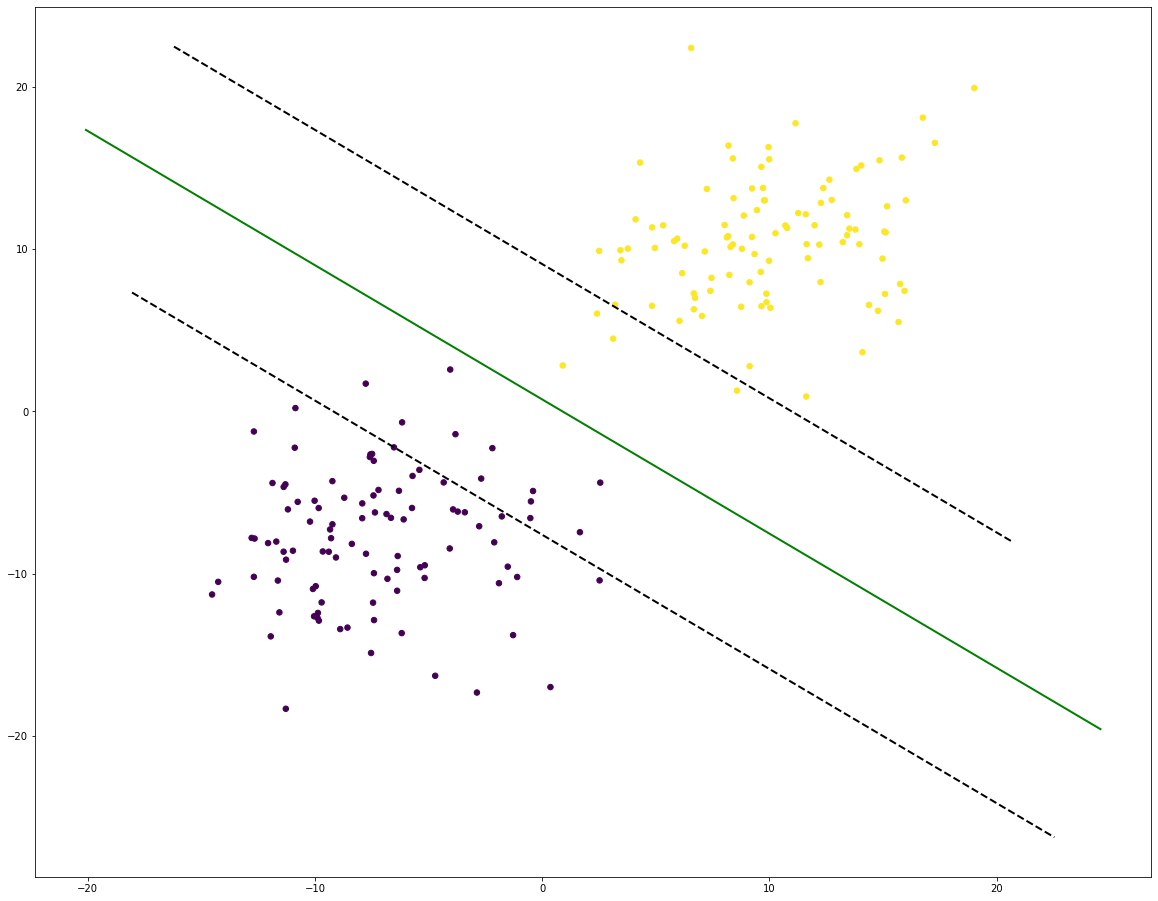

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import numpy as np

n = 100
hinge_data_numpy = 2*np.r_[2*np.random.randn(n, 2) - [4., 4.], 2*np.random.randn(n, 2) + [5., 5.]]
hinge_labels_numpy = np.array([-1] * n + [1] * n)


class HingeLossClassifier():
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def hinge_loss(self, X, y, w, b, c):
        """
        Compute c times average Hinge Loss plus ||w||^2 on Torch tensors
        torch.sum and x.clamp may com in useful
     
        Args:
            X: torch.tensor shape n,d 
            y: torch.tensor shape n, 
            w: torch.tensor shape d,
            b: float
            c: float scaler for c hinge loss
        Returns:
        loss torch.tensor 1 x 1     
        """
        ### YOUR CODE HERE
        pred = X @ w + b
        loss = (1.0 - pred * y)
        loss = loss.clamp(min=0)
        # print('loss after', loss)
        out = c*torch.mean(loss)
        reg = torch.sum(w**2)
        out = out + reg
        ### END CODE
        return out

    def predict(self, X):
        """ Compute predictions on X (predictions in -1,+1)
        
        Args:
            X: torch.tensor shape n,d 
        """
        out = None
        ### YOUR CODE HERE
        out = torch.sign(X@self.w + b)
        ### END CODE
        return out
    
    def score(self, X, y):
        """ Compute accuracy of classifier on y
        
        Args:
            X: torch.tensor shape n,d 
            y: torch.tensor shape n, 
        """
        acc = None
        ### YOUR CODE HERE
        acc = (self.predict(X)==Y).mean()
        ### END CODE
        return acc
    
    def fit(self, X, y, c, epochs, lr):
        """ Gradient Descent Algorithm 
        
        Args:
            X: torch.tensor shape n,d 
            y: torch.tensor shape n, 
            c: float scalar for c * hinge in loss
            epochs: int - number of iterations of gradient descent
            lr: float, learning rate for gradient descent
        """
        w = torch.zeros(X.shape[1], requires_grad=True)
        b = torch.zeros(1, 1, requires_grad=True)
        n = torch.tensor([len(y)],dtype=torch.float64)
        optimizer = optim.SGD([w, b], lr=lr)
        # remember to call optimizer.zero_grad
        ### YOUR CODE HERE
        for i in range(epochs):
            optimizer.zero_grad() # clears gradients otherwise they are accumulated
            loss = self.hinge_loss(X, y, w, b, c)
            loss.backward()
            acc = torch.sum(((X @ w + b) * y)>0)/n
            print('round: {0}, loss: {1}, accuracy: {2}'.format(i, loss.item(), acc.item()))
            optimizer.step() # take a gradient step
        ### END CODE
        self.w = w.detach()
        self.b = b.detach()
        
hinge_data_torch = torch.from_numpy(hinge_data_numpy).float()
hinge_labels_torch = torch.from_numpy(hinge_labels_numpy).float()
w_test = torch.tensor([-1., -1], requires_grad=True)
b_test = torch.tensor([1.0], requires_grad=True)
c_test = 1.0

print('Check your computations from above')
cl = HingeLossClassifier()
loss = cl.hinge_loss(hinge_data_torch, hinge_labels_torch, w_test, b_test, c_test)
loss.backward()
print('check loss and gradient: ', loss.item(),'w grad: ', w_test.grad, 'b grad:', b_test.grad)

print('Run Gradient Descent')
cl.fit(hinge_data_torch, hinge_labels_torch, 1, 30, 0.1)
w = cl.w.numpy()
b = cl.b.numpy().ravel()[0]
print('Learned w and b', cl.w.numpy(), cl.b.numpy())

def plot_hyperplane(ax, w, b, *args, **kwargs): 
    xmin, xmax, ymin, ymax = ax.axis()
    
    if w[1]==0:
        # Vertical line
        print('vert')
        x = np.array((1 / w[0], 1 / w[0]))
        y = np.array((ymin, ymax))
    else:
        x = np.array((xmin, xmax))
        y = (-b -w[0] * x) / w[1]       
    # plot the line
    print(x, y)
    ax.plot(x, y, *args, **kwargs)


fig, ax = plt.subplots(1, 1, figsize=(20, 16))
ax.scatter(hinge_data_numpy[:,0], hinge_data_numpy[:, 1], c=hinge_labels_numpy, s=30)
margin = 1/np.linalg.norm(w)
plot_hyperplane(ax, w, b - 1,'k--', linewidth=2)
plot_hyperplane(ax, w, b + 1,'k--', linewidth=2)
plot_hyperplane(ax, w, b,'g-', linewidth=2)

plt.show()
